# Entregável 1 - visão computacional

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print ("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 2.4.11 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg")

In [3]:
rintin.shape

(240L, 320L, 3L)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240L, 320L)

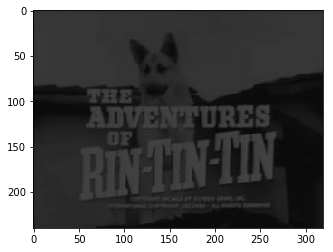

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

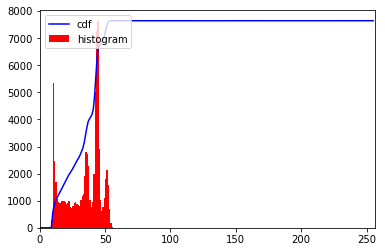

In [7]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

## Atividade 1

Realize as seguintes atividades:

1. O histograma fornecido aproveita bem as faixas de cores?
2. Equalize o histograma de maneira que a cumulativa seja uma função linear na diagonal do gráfico
3. Plote a imagem desenhada

In [8]:
mi = rintin_gray.min()
ma = rintin_gray.max()
print("minimo: {0}" .format(mi))
print("maximo: {0}" .format(ma))

minimo: 8
maximo: 58


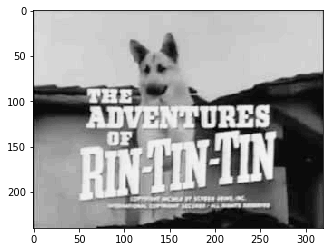

In [9]:
for i in range(len(rintin_gray)):
    for j in range(len(rintin_gray[i])):
        rintin_gray[i][j] = rintin_gray[i][j]*5.1 - 40.8
        
plt.imshow(rintin_gray, cmap = "Greys_r", vmin = 0, vmax = 255)

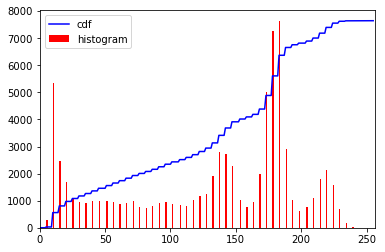

minimo: 0
maximo: 254


In [10]:
hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

mi = rintin_gray.min()
ma = rintin_gray.max()
print("minimo: {0}" .format(mi))
print("maximo: {0}" .format(ma))

Como podemos observar, a última imagem que está mais clara aproveita melhor as faixas de cores por variar de 0 a 254

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](hall_box_battery1.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e a bateria azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui


In [25]:
boximg = "hall_box_battery1.jpg"
pic = cv2.imread(boximg)
picrgb = cv2.cvtColor(pic, cv2.COLOR_BGR2RGB)
pic.shape

(3006L, 5344L, 3L)

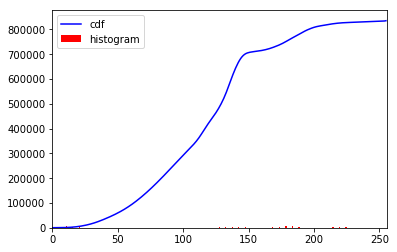

In [26]:
hist,bins = np.histogram(pic.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Não é possível identificar a caixa vermelha ou a bateria azul pelo histograma pois, ao olhar o histograma, tudo oq conseguimos perceber é a quantidade do tom de cada cor presente na imagem. A presença de vermelho alto por exemplo, pode representar a cor branca quando misturada com azul alto e verde alto.

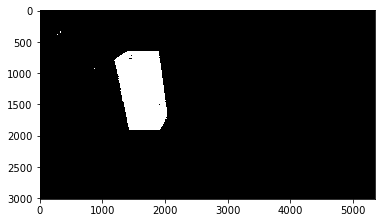

In [27]:
for i in range (len(picrgb)):
    for j in range (len(picrgb[i])):
        if picrgb[i][j][0] > 160 and picrgb[i][j][1]<145 and picrgb[i][j][2]<145:
            picrgb[i][j][0]=255
            picrgb[i][j][1]=255
            picrgb[i][j][2]=255
        else:
            picrgb[i][j][0]=0
            picrgb[i][j][1]=0
            picrgb[i][j][2]=0
            
plt.imshow(picrgb)